In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("Estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Parte 1
## Haz el preprocesamiento necesario para generar el DataFrame de entrada donde las 3 columnas de puntuación estén categorizadas en 4 clases diferentes (muy baja, baja, media y alta) con rangos de 25 puntos.

In [3]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['math score'] >= 0) & (data['math score'] <=25),
    (data['math score'] >= 26) & (data['math score'] <=51),
    (data['math score'] >= 52) & (data['math score'] <=77),
    (data['math score'] > 78)]
choicelist = ['muy bajam', 'bajam', 'mediam','altam']
data['math score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,72,74
1,female,group C,some college,standard,completed,mediam,90,88
2,female,group B,master's degree,standard,none,altam,95,93
3,male,group A,associate's degree,free/reduced,none,bajam,57,44
4,male,group C,some college,standard,none,mediam,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,99,95
996,male,group C,high school,free/reduced,none,mediam,55,55
997,female,group C,high school,free/reduced,completed,mediam,71,65
998,female,group D,some college,standard,completed,mediam,78,77


In [4]:
conditionlist = [
    (data['reading score'] >= 0) & (data['reading score'] <=25),
    (data['reading score'] >= 26) & (data['reading score'] <=50),
    (data['reading score'] >= 51) & (data['reading score'] <=76),
    (data['reading score'] > 76)]
choicelist = ['muy bajar', 'bajar', 'mediar','altar']
data['reading score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,74
1,female,group C,some college,standard,completed,mediam,altar,88
2,female,group B,master's degree,standard,none,altam,altar,93
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,44
4,male,group C,some college,standard,none,mediam,altar,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,95
996,male,group C,high school,free/reduced,none,mediam,mediar,55
997,female,group C,high school,free/reduced,completed,mediam,mediar,65
998,female,group D,some college,standard,completed,mediam,altar,77


In [5]:
conditionlist = [
    (data['writing score'] >= 0) & (data['writing score'] <=25),
    (data['writing score'] >= 26) & (data['writing score'] <=50),
    (data['writing score'] >= 51) & (data['writing score'] <=76),
    (data['writing score'] > 76)]
choicelist = ['muy bajaw', 'bajaw', 'mediaw','altaw']
data['writing score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,mediaw
1,female,group C,some college,standard,completed,mediam,altar,altaw
2,female,group B,master's degree,standard,none,altam,altar,altaw
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,bajaw
4,male,group C,some college,standard,none,mediam,altar,mediaw
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,altaw
996,male,group C,high school,free/reduced,none,mediam,mediar,mediaw
997,female,group C,high school,free/reduced,completed,mediam,mediar,mediaw
998,female,group D,some college,standard,completed,mediam,altar,altaw


## Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

In [6]:
datos=data.iloc[:,5:8]
datos=np.array(datos)
datos

array([['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['altam', 'altar', 'altaw'],
       ...,
       ['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['mediam', 'altar', 'altaw']], dtype=object)

In [7]:
te = TransactionEncoder()
te_ary = te.fit(datos).transform(datos)
df = pd.DataFrame(te_ary, columns=te.columns_)
df=df.drop(columns='Not Specified')

## Primera Configuracion

In [8]:
association_rules1 = apriori(df, min_support=0.001,use_colnames=True)
association_rules1['length']=association_rules1['itemsets'].apply(lambda x: len(x))
association_rules1['frecuencia']=association_rules1['support']*len(data.index)
association_rules1

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
...,...,...,...,...
57,0.005,"(muy bajam, bajaw, bajar)",3,5.0
58,0.007,"(mediaw, mediam, bajar)",3,7.0
59,0.021,"(bajaw, mediam, mediar)",3,21.0
60,0.394,"(mediaw, mediam, mediar)",3,394.0


## Segunda Configuracion

In [9]:
association_rules2 = apriori(df, min_support=0.01,use_colnames=True)
association_rules2['length']=association_rules2['itemsets'].apply(lambda x: len(x))
association_rules2['frecuencia']=association_rules2['support']*len(data.index)
association_rules2

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
5,0.119,(bajaw),1,119.0
6,0.610,(mediam),1,610.0
7,0.584,(mediar),1,584.0
8,0.573,(mediaw),1,573.0
9,0.173,"(altar, altam)",2,173.0


## Tercera Configuracion

In [10]:
association_rules3 = apriori(df, min_support=0.1,use_colnames=True)
association_rules3['length']=association_rules3['itemsets'].apply(lambda x: len(x))
association_rules3['frecuencia']=association_rules3['support']*len(data.index)
association_rules3

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.119,(bajaw),1,119.0
5,0.610,(mediam),1,610.0
6,0.584,(mediar),1,584.0
7,0.573,(mediaw),1,573.0
8,0.173,"(altar, altam)",2,173.0
9,0.160,"(altaw, altam)",2,160.0


## ¿Que diferencias hay entre usar soporte y frecuencia?

### Soporte

In [11]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['support'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altaw, altar, altam)",3,153.0
43,0.020,"(mediaw, altar, altam)",3,20.0
44,0.007,"(altaw, mediar, altam)",3,7.0
45,0.035,"(mediaw, mediar, altam)",3,35.0
46,0.101,"(altaw, altar, mediam)",3,101.0
47,0.034,"(mediaw, altar, mediam)",3,34.0
48,0.001,"(altaw, mediar, bajam)",3,1.0
49,0.031,"(altaw, mediam, mediar)",3,31.0
50,0.053,"(bajaw, bajam, bajar)",3,53.0
51,0.005,"(mediaw, bajam, bajar)",3,5.0


### Frecuencia

In [12]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['frecuencia'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altaw, altar, altam)",3,153.0
43,0.020,"(mediaw, altar, altam)",3,20.0
44,0.007,"(altaw, mediar, altam)",3,7.0
45,0.035,"(mediaw, mediar, altam)",3,35.0
46,0.101,"(altaw, altar, mediam)",3,101.0
47,0.034,"(mediaw, altar, mediam)",3,34.0
48,0.001,"(altaw, mediar, bajam)",3,1.0
49,0.031,"(altaw, mediam, mediar)",3,31.0
50,0.053,"(bajaw, bajam, bajar)",3,53.0
51,0.005,"(mediaw, bajam, bajar)",3,5.0


La frecuencia es el numero de veces que aparece un itemset en el dataset y el soporte es la frecuencia entre el numero de transacciones del dataframe.
Por lo tanto no hay ninguna diferencia.

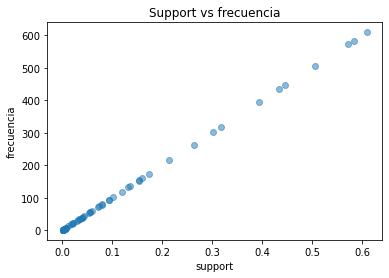

In [13]:
#Representacion 1 
plt.scatter(association_rules1['support'], association_rules1['frecuencia'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('frecuencia')
plt.title('Support vs frecuencia')
plt.show()

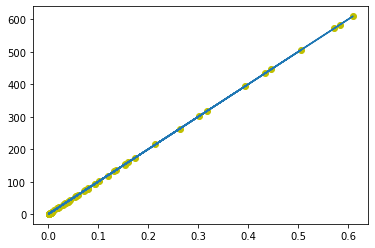

In [14]:
#Representacion 2
fit = np.polyfit(association_rules1['support'], association_rules1['frecuencia'], 1)
fit_fn = np.poly1d(fit)
plt.plot(association_rules1['support'], association_rules1['frecuencia'], 'yo', association_rules1['support'], 
 fit_fn(association_rules1['support']))

## ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? 

Desaparecen las reglas que no cumplen con los requerimientos impuestos por la configuracion. Porque no cumplen la condiciones de la configuracion.

## Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

In [15]:
rules1 = association_rules(association_rules1, metric="confidence", min_threshold=0.6)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
2,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
3,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
4,(bajar),(bajam),0.093,0.154,0.059,0.634409,4.119536,0.044678,2.314059


In [16]:
rules12 = association_rules(association_rules1, metric="lift", min_threshold=0.4)
rules12.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altar),(altam),0.319,0.215,0.173,0.542320,2.522417,0.104415,1.715171
1,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
2,(altaw),(altam),0.303,0.215,0.160,0.528053,2.456060,0.094855,1.663322
3,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
4,(mediaw),(altam),0.573,0.215,0.055,0.095986,0.446447,-0.068195,0.868349


Podemos ver que al cambiar la metrica de confianza a lift, siendo lift el soporte entre la confianza, la primera regla tiene el mismo valor de lift que la segunda, teniendo esta segunda mucha mas confianza. Ocurre el mismo caso con la tercera y la cuarta regla.

## Dadas las mejores configuraciones para cada tipo de puntuación.¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los mejores y peores estudiantes?

In [17]:
# Todo el dataset
association_rulesbest = apriori(df, min_support=0.001,use_colnames=True)
association_rulesbest['length']=association_rulesbest['itemsets'].apply(lambda x: len(x))
association_rulesbest['frecuencia']=association_rulesbest['support']*len(data.index)
association_rulesbest.head(15)

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
5,0.119,(bajaw),1,119.0
6,0.610,(mediam),1,610.0
7,0.584,(mediar),1,584.0
8,0.573,(mediaw),1,573.0
9,0.007,(muy bajam),1,7.0


# Segunda parte

In [18]:
#Utilizamos todo el dataframe
association_rules1 = apriori(df,min_support=0.001,use_colnames=True)
association_rules1['length']=association_rules1['itemsets'].apply(lambda x: len(x))
association_rules1['frecuencia']=association_rules1['support']*len(data.index)

## Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemset.

In [19]:
association_rules1[ (association_rules1['length'] == 1)]

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
5,0.119,(bajaw),1,119.0
6,0.610,(mediam),1,610.0
7,0.584,(mediar),1,584.0
8,0.573,(mediaw),1,573.0
9,0.007,(muy bajam),1,7.0


## A partir de k=2 mostrar items candidatos y soporte

In [20]:
association_rules1[ (association_rules1['length'] == 2)]

,support,itemsets,length,frecuencia
12,0.173,"(altar, altam)",2,173.0
13,0.160,"(altaw, altam)",2,160.0
14,0.042,"(mediar, altam)",2,42.0
15,0.055,"(mediaw, altam)",2,55.0
16,0.264,"(altaw, altar)",2,264.0
17,0.135,"(altar, mediam)",2,135.0
18,0.055,"(mediaw, altar)",2,55.0
19,0.001,"(altaw, bajam)",2,1.0
20,0.132,"(altaw, mediam)",2,132.0
21,0.039,"(altaw, mediar)",2,39.0


## Repetir el proceso hasta que no se muestren items frecuentes

In [21]:
# Se dejan de mostrat items frecuentes a partir de k=4
association_rules1[ (association_rules1['length'] == 4)]

,support,itemsets,length,frecuencia


## Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [22]:
rules1 = association_rules(association_rules1, metric="confidence")
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
2,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
3,(bajar),(bajaw),0.093,0.119,0.080,0.860215,7.228698,0.068933,6.302538
4,(mediaw),(mediar),0.573,0.584,0.506,0.883072,1.512109,0.171368,3.557731
5,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026
6,(muy bajar),(muy bajaw),0.004,0.005,0.004,1.000000,200.000000,0.003980,inf
7,(muy bajaw),(muy bajar),0.005,0.004,0.004,0.800000,200.000000,0.003980,4.980000
8,"(altaw, altam)",(altar),0.160,0.319,0.153,0.956250,2.997649,0.101960,15.565714
9,"(altar, altam)",(altaw),0.173,0.303,0.153,0.884393,2.918789,0.100581,6.029050


## Listar todas las reglas que sean de alta confianza.

In [23]:
# Suponemos que las reglas de alta confianza son a partir de 0.7 de confianza
rules1[ (0.7<=rules1['confidence'])].sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(altaw, bajam)",(mediar),0.001,0.584,0.001,1.000000,1.712329,0.000416,inf
13,"(muy bajaw, bajar)",(bajam),0.001,0.154,0.001,1.000000,6.493506,0.000846,inf
20,"(muy bajam, muy bajaw)",(muy bajar),0.002,0.004,0.002,1.000000,250.000000,0.001992,inf
17,"(muy bajam, bajar)",(bajaw),0.005,0.119,0.005,1.000000,8.403361,0.004405,inf
16,"(muy bajam, bajaw)",(bajar),0.005,0.093,0.005,1.000000,10.752688,0.004535,inf
15,"(muy bajar, bajam)",(muy bajaw),0.002,0.005,0.002,1.000000,200.000000,0.001990,inf
21,"(muy bajam, muy bajar)",(muy bajaw),0.002,0.005,0.002,1.000000,200.000000,0.001990,inf
6,(muy bajar),(muy bajaw),0.004,0.005,0.004,1.000000,200.000000,0.003980,inf
8,"(altaw, altam)",(altar),0.160,0.319,0.153,0.956250,2.997649,0.101960,15.565714
14,"(mediaw, bajam)",(mediar),0.079,0.584,0.074,0.936709,1.603954,0.027864,6.572800


## Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.

In [24]:
# El antecesor seleccionado es mediar
targeted_rules = rules1[rules1['antecedents'] == {'mediar'}].copy()
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026


## Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

In [25]:
# Umbral minimo de 0.7 de confianza
targeted_rules[0.7<targeted_rules['confidence']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026


## Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.

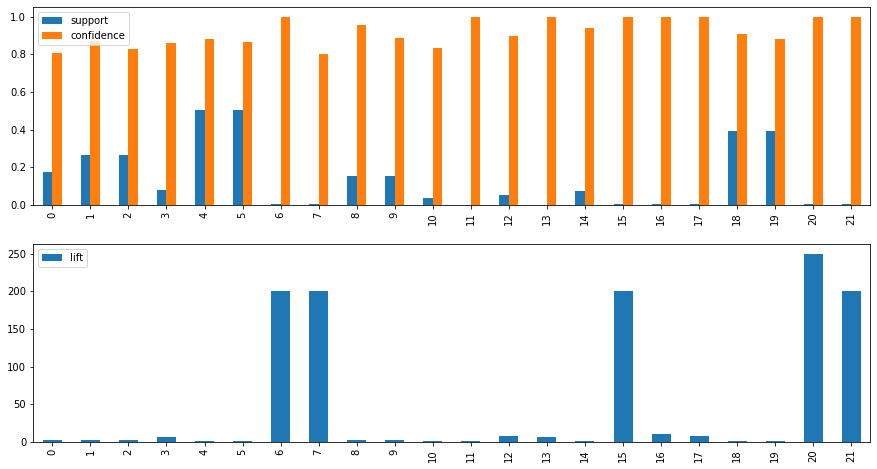

In [73]:
# Subplot con dos representaciones
# La primera se trata de un grafico de barras de dos variables, el soporte y la confianza
# La segunda representamos unicamente el lift para poder bien la relacion entre los datos
fig, axes = plt.subplots(nrows=2, ncols=1)
rules1[["support","confidence"]].plot(ax=axes[0],figsize=(15, 8), kind='bar')
rules1[["lift"]].plot(ax=axes[1],figsize=(15, 8), kind='bar');

Podemos ver que en los casos que el support es alto, el lift es bajo y en los casos que la confianza es alta y el soporte es bajo, el lift es alto. Tal y como podiamos esperar segun la formula. lift=soporte/confianza.